In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Reto 1 

Utiliza este dataset: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption


Transforma ese dataset con las tecnicas vistas en clase en un dataframe que sea apto para un modelo de Machine Learning. Parametriza las variables `WINDOW` (que sera el numero de features) y `lookahead=1`


In [2]:
#Abrimos dataset: hourly power consumption
pch = pd.read_csv("consumo\PJME_hourly.csv")

#plt.plot(pch['PJME_MW'])

In [3]:
pch['T'] = [ elem[:-10] for elem in pch['Datetime'] ]
del(pch['Datetime'])
pch.set_index('T', inplace= True)
pch.columns = ['MW']


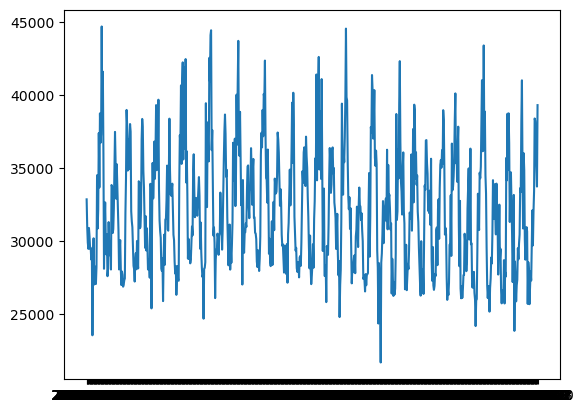

In [4]:
pch_dias = pch.groupby('T')['MW'].mean()
plt.plot(pch_dias)

In [5]:

#pch_dias['Dia'] = np.arange(0, len(pch_dias['MW']), step=1)

window = 5
lookahead = 1

x = []
y = []

for i in range(len(pch_dias) - window - lookahead +1):
    x.append(pch_dias[i:i+window])
    y.append(pch_dias[i+window+lookahead-1])
    
x = np.array(x)
y = np.array(y)

In [6]:
y.shape

(775,)

In [7]:
x.shape

(775, 5)

Entrena un modelo para este dataset, dividiendo correctamente entre train y test.

**Extra**: Utiliza LightGBM o XGBoost (tendras que ver como instalarlo correctamente y leer su documentacion)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [7]:
from xgboost import XGBRegressor



In [9]:
xgboost = XGBRegressor()
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)



**Extra**: Haz predicciones recurrentes igual al numero de valores en el test set. Esto es, cuando realices la primera prediccion (t+1) tendras un nuevo punto en tu dataset. Utilizalo para construir los datos necesarios para poder predecir t+2, no utlices los datos originales.


In [10]:
y_pred = xgboost.predict(x_test)
y_pred

array([27329.53 , 27331.307, 30080.326, 37797.633, 31159.81 , 37331.043,
       29094.352, 32930.305, 34055.566, 34920.76 , 33511.28 , 34135.273,
       36183.227, 40268.926, 38809.07 , 37242.26 , 35080.04 , 36830.766,
       35943.   , 33875.78 , 27349.324, 33065.742, 27232.635, 28784.656,
       26877.107, 27217.824, 28825.826, 34783.11 , 29780.133, 34590.57 ,
       29299.213, 32079.195, 30305.025, 26696.854, 31536.361, 32870.625,
       33637.32 , 29688.102, 29628.64 , 34091.168, 32606.057, 31709.326,
       27500.14 , 27509.916, 27481.822, 28698.05 , 28415.518, 28350.838,
       26820.152, 30662.271, 31220.555, 35254.043, 38824.285, 35480.203,
       34413.242, 34647.656, 35437.836, 32652.775, 34876.51 , 38388.41 ,
       40114.348, 37926.316, 37635.438, 38427.418, 37345.43 , 32770.754,
       31466.912, 30568.014, 30228.63 , 26774.459, 27360.35 , 27188.889,
       28574.963, 31782.17 , 32267.98 , 31083.873, 31589.008, 34790.676,
       36628.395, 32164.588, 33437.184, 34964.54 , 

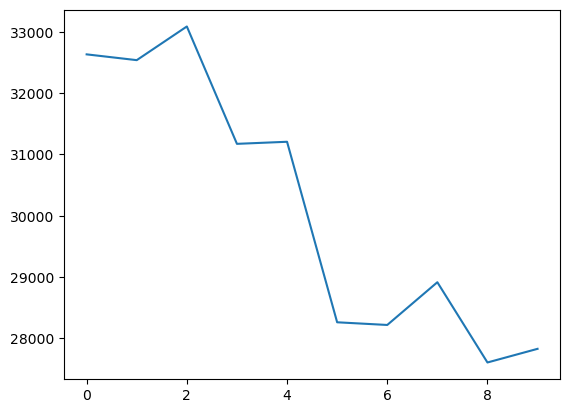

In [14]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[1]-1):
        x_test[0][i] = x_test[0][i+1]
    x_test[0][x_test.shape[1]-1]=nuevoValor
    return x_test

results=[]
for i in range(10):
    parcial=xgboost.predict(x_test)
    results.append(parcial[0])
    x_test=agregarNuevoValor(x_test,parcial[0])
    
    
plt.plot(results)



Repite este proceso hasta predecir todo el test set.




Haz un plot en el que se muestren los datos originales y los datos predecidos.

### Reto 2

Repite el ejercicio de prediccion de precios de las casas.



A la hora de entrenar el modelo utiliza el metodo `GridSearchCV` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) siguiendo la documentacion.





Cuando termines haz un `print(model.cv_results_)`, siendo la variable `model` el objeto de `GridSearchCV`. ¿Que hay ahi? Analiza las distintas partes del resultado.




¿Cuantos valores hay en las listas que aparecen?
¿Cuantos modelos se han entrenado en total?
¿Cual es el mejor modelo?
¿Que ocurre cuando hacemos una inferencia?